Enter number of points in shape:  3
Enter x coordinate of point 1:  5
Enter y coordinate of point 1:  6
Enter x coordinate of point 2:  8
Enter y coordinate of point 2:  7
Enter x coordinate of point 3:  3
Enter y coordinate of point 3:  6
Choose transformation:
1. Translation
2. Rotation
Enter choice:  2
Enter angle of rotation (degrees):  45
Rotate about origin (O) or a custom point (C)? [O/C]:  0


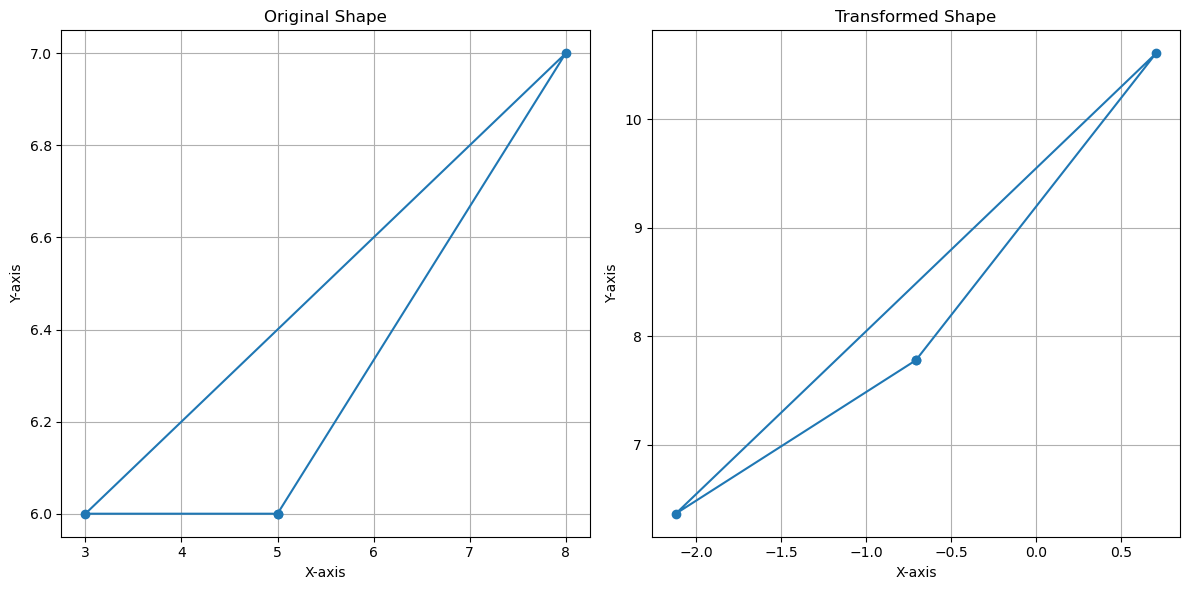


Transformed points:
(-0.71, 7.78)
(0.71, 10.61)
(-2.12, 6.36)


In [2]:
import math
import matplotlib.pyplot as plt

def translate(points, tx, ty):
    """Translate points by (tx, ty)."""
    translated_points = []
    for x, y in points:
        translated_points.append((x + tx, y + ty))
    return translated_points

def rotate(points, angle_degrees, pivot=(0, 0)):
    """Rotate points by angle_degrees around a pivot."""
    angle_radians = math.radians(angle_degrees)
    cos_theta = math.cos(angle_radians)
    sin_theta = math.sin(angle_radians)

    px, py = pivot
    rotated_points = []

    for x, y in points:
        # Translate point back to origin
        x_shifted = x - px
        y_shifted = y - py

        # Rotate point
        x_rotated = x_shifted * cos_theta - y_shifted * sin_theta
        y_rotated = x_shifted * sin_theta + y_shifted * cos_theta

        # Translate point back
        rotated_points.append((x_rotated + px, y_rotated + py))

    return rotated_points

def plot_shape(points, title):
    x_coords, y_coords = zip(*points)
    plt.plot(x_coords + (x_coords[0],), y_coords + (y_coords[0],), marker='o')  # Close the shape
    plt.title(title)
    plt.grid(True)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.savefig("2D transformation(translation,rotation).jpg")

if __name__ == "__main__":
    # Define original shape (Triangle)
    points = []
    n = int(input("Enter number of points in shape: "))
    for i in range(n):
        x = float(input(f"Enter x coordinate of point {i+1}: "))
        y = float(input(f"Enter y coordinate of point {i+1}: "))
        points.append((x, y))

    # Plot original shape
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plot_shape(points, "Original Shape")

    # Get transformation choice
    choice = int(input("Choose transformation:\n1. Translation\n2. Rotation\nEnter choice: "))

    if choice == 1:
        tx = float(input("Enter translation along x-axis: "))
        ty = float(input("Enter translation along y-axis: "))
        new_points = translate(points, tx, ty)
    elif choice == 2:
        angle = float(input("Enter angle of rotation (degrees): "))
        pivot_choice = input("Rotate about origin (O) or a custom point (C)? [O/C]: ").strip().upper()
        if pivot_choice == 'C':
            px = float(input("Enter pivot x: "))
            py = float(input("Enter pivot y: "))
            pivot = (px, py)
        else:
            pivot = (0, 0)
        new_points = rotate(points, angle, pivot)
    else:
        print("Invalid choice!")
        exit()

    # Plot transformed shape
    plt.subplot(1, 2, 2)
    plot_shape(new_points, "Transformed Shape")
    plt.tight_layout()
    plt.show()

    print("\nTransformed points:")
    for pt in new_points:
        print(f"({pt[0]:.2f}, {pt[1]:.2f})")
